In [9]:
import fv3viz
import matplotlib.pyplot as plt
from run_dict import RUN_DICT, BASELINE_ALG, ML_ONLY_ALG, MINMAX_T, OCSVM_T, OCSVM_DEFAULT, ML_ONLY_TQ_ALG
import data_retrieval_utils as dru

fv3viz.use_colorblind_friendly_style()

In [2]:
table_run_names = {
    BASELINE_ALG: r"Baseline",
    ML_ONLY_ALG: r"ML-corrected $g_{\mathrm{Tquv}}$",
    MINMAX_T: r"ND ML $g_{\mathrm{Tquv}}, \eta_{\mathrm{T, minmax}}$",
    OCSVM_T: r"ND ML $g_{\mathrm{Tq}}, \eta_{\mathrm{T, OCSVM}}, \gamma=\frac{4}{79}$",
    OCSVM_DEFAULT: r"ND ML $g_{\mathrm{Tq}}, \eta_{\mathrm{Tq, OCSVM}}, \gamma=\frac{4}{79}$",
}

In [3]:
table_metrics = [
    "rmse_of_time_mean/tmp200",
    "rmse_of_time_mean/tmp850",
    "rmse_of_time_mean/total_precip_to_surface",
    "rmse_of_time_mean/pwat"
]

In [4]:
runs = {name: RUN_DICT[name] for name in table_run_names}

In [5]:
diags_complete = dru.get_diags_complete_downloaded(runs)
metrics = dru.get_metrics(runs)

/home/claytons/miniconda3/envs/fv3net/lib/python3.8/site-packages/google/auth/_default.py:70: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


### Time-averaged RMSE comparison for relevent metrics and novelty detection fraction for each run

In [7]:
for name in table_run_names:
    if name not in [BASELINE_ALG, ML_ONLY_ALG, ML_ONLY_TQ_ALG]:
        print(f"{name} novelty_rate: {diags_complete[name].is_novelty_spatial_mean_global.mean().item()}")
    for metric in table_metrics:
        print(f"{name} {metric}: {metrics[name][metric]['value']}")

baseline rmse_of_time_mean/tmp200: 2.4777960777282715
baseline rmse_of_time_mean/tmp850: 2.0860824584960938
baseline rmse_of_time_mean/total_precip_to_surface: 1.7809481457785814
baseline rmse_of_time_mean/pwat: 2.794926881790161
ml-only rmse_of_time_mean/tmp200: 3.845698118209839
ml-only rmse_of_time_mean/tmp850: 1.2622606754302979
ml-only rmse_of_time_mean/total_precip_to_surface: 1.3271982663834156
ml-only rmse_of_time_mean/pwat: 4.425719261169434
minmax_T novelty_rate: 0.00822972461575585
minmax_T rmse_of_time_mean/tmp200: 3.9438884258270264
minmax_T rmse_of_time_mean/tmp850: 1.3054041862487793
minmax_T rmse_of_time_mean/total_precip_to_surface: 1.3354866639953367
minmax_T rmse_of_time_mean/pwat: 4.429327964782715
ocsvm_T novelty_rate: 0.045816877581451844
ocsvm_T rmse_of_time_mean/tmp200: 3.3786559104919434
ocsvm_T rmse_of_time_mean/tmp850: 1.3291258811950684
ocsvm_T rmse_of_time_mean/total_precip_to_surface: 1.3504983560841757
ocsvm_T rmse_of_time_mean/pwat: 4.553725719451904
ocs

### T850 RMSE over one year
Note: standard Tq OCSVM only runs for 6 months

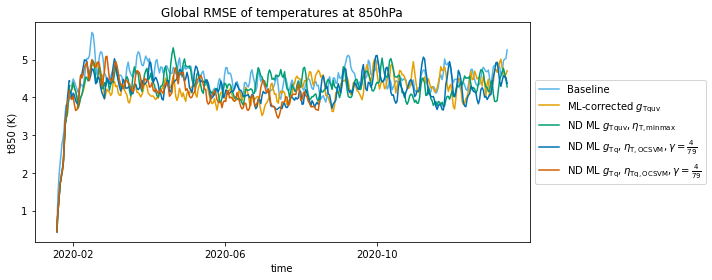

In [10]:
plt.figure(figsize=(10, 4), tight_layout=True)
for name, label in table_run_names.items():
    diags_complete[name].tmp850_rms_global.plot(label=label)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel(r"t850 (K)")
plt.title(r"Global RMSE of temperatures at 850hPa")
plt.show()